# <h1 style='Text-align: center;'>**1. Python Programming Review**</h1>
# <h1 style='Text-align: center;'>Data Science in Engineering</h1>

`Created by: Erick Eduardo Robledo Montes`

---
---

## Libraries

In [6]:
import numpy as np
import pandas as pd
import csv
import io
import math
import requests
import matplotlib.pyplot as plt
from pyaudio import PyAudio 

## Part 1: Array Manipulation

### Matrix Functions

In [80]:
def product_matrix(matrix_a : list, matrix_b : list) -> np.array:
    n = len(matrix_a)
    matrix_cero = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                matrix_cero[i][j] += matrix_a[i][k] * matrix_b[k][j]
    return matrix_cero

def transpose_matrix(matrix : list) -> np.array:
    n = len(matrix)
    matrix_cero = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            matrix_cero[i][j] = matrix[j][i]
    return matrix_cero

def diagonal_matrix_easiest_method(matrix : list) -> np.array:
    n = len(matrix)
    matrix_cero = np.zeros((n,n))
    for i in range(n):
        matrix_cero[i][i] = matrix[i][i]
    return matrix_cero

def sum_matrix(matrix_a : list, matrix_b : list) -> np.array:
    n = len(matrix_a)
    matrix_cero = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            matrix_cero[i][j] = matrix_a[i][j] + matrix_b[i][j]
    return matrix_cero

def diagonal_matrix_numerical_method(matrix : list) -> np.array:
    n = len(matrix)
    for k in range(n):
        for l in range(n):
            if l != k:
                for m in range(n):
                    matrix[l][m] = matrix[l][m] - (matrix[l][k] / matrix[k][k]) * matrix[k][m]
    return np.array(matrix)

def invertible_matrix(matrix : list) -> np.array:
    n = len(matrix)
    if n == 1:
        return "La matriz debe ser mayor o igual a 2x2"
    elif n == 2:
        det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    else:
        zeros = np.zeros((n,n+(n-1)))
        for i in range(n):
            for j in range(n):
                zeros[i][j] = matrix[i][j]
        for k in range(n-1):
            for m in range(n):
                zeros[m][k+n] = matrix[m][k]
        sum_det = []
        dec_det = []
        for i in range(n):
            for j in range(n):
                sum_det.append(zeros[j][n-i+j-1])
                dec_det.append(zeros[j][-i-j-1])
        output_1 = [np.prod(sum_det[i : n+i]) for i in range(0,len(sum_det),n)]
        output_2 = [np.prod(dec_det[i : n+i]) for i in range(0,len(dec_det),n)]
        det = np.array(output_1).sum() - np.array(output_2).sum()
        transformed_matrix = matrix / det
        return det

def attached_matrix(matrix : list) -> np.array:
    n = len(matrix)
    zero_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            zero_matrix[i][j] = (
                matrix[i-2][j-2] * matrix[i-1][j-1] -
                matrix[i-2][j-1] * matrix[i-1][j-2]
            )
    return zero_matrix

### Multiple dimension matrix

In [81]:
A = [
    [5,-2],
    [4,1]
]
B = [
    [2,0],
    [-1,3]
]
C = [
    [3,2,-3],
    [7,-1,0],
    [2,-4,5]
]

### $C = AB$

In [82]:
prod_matrix = product_matrix(A,B)
print(f"Own product_matrix: ")
print(prod_matrix)
print(f"NumPy product_matrix: ")
print(np.dot(A,B))

Own product_matrix: 
[[12. -6.]
 [ 7.  3.]]
NumPy product_matrix: 
[[12 -6]
 [ 7  3]]


### $C = A^{-1}$

In [83]:
# Attached Matrix
att_matrix = attached_matrix(C)
att_matrix

array([[ -5., -35., -26.],
       [  2.,  21.,  16.],
       [ -3., -21., -17.]])

In [84]:
det = invertible_matrix(C)
det

-7.0

In [85]:
trans_matrix = transpose_matrix(att_matrix)
trans_matrix

array([[ -5.,   2.,  -3.],
       [-35.,  21., -21.],
       [-26.,  16., -17.]])

In [86]:
print(f"Own inversed:matrix: ")
inverse = trans_matrix / det
print(inverse)
print(f"NumPy inversed_matrix: ")
print(np.linalg.inv(C))

Own inversed:matrix: 
[[ 0.71428571 -0.28571429  0.42857143]
 [ 5.         -3.          3.        ]
 [ 3.71428571 -2.28571429  2.42857143]]
NumPy inversed_matrix: 
[[ 0.71428571 -0.28571429  0.42857143]
 [ 5.         -3.          3.        ]
 [ 3.71428571 -2.28571429  2.42857143]]


### $C = diag(A)$

In [87]:
print(f"NumPy diagonal_array_values: ")
print(np.diag(C))

diagonal_matrix = diagonal_matrix_numerical_method(C)
print(f"Own diagonal_matrix: ")
print(diagonal_matrix)

NumPy diagonal_array_values: 
[ 3 -1  5]
Own diagonal_matrix: 
[[ 3.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  5.]]


### $C = A+B$

In [88]:
sum_mat = sum_matrix(A, B)
print(f"Own sum_matrix: ")
print(sum_mat)
print(f"NumPy sum_matrix: ")
print(np.add(A,B))

Own sum_matrix: 
[[ 7. -2.]
 [ 3.  4.]]
NumPy sum_matrix: 
[[ 7 -2]
 [ 3  4]]


## Part 2: Plotting

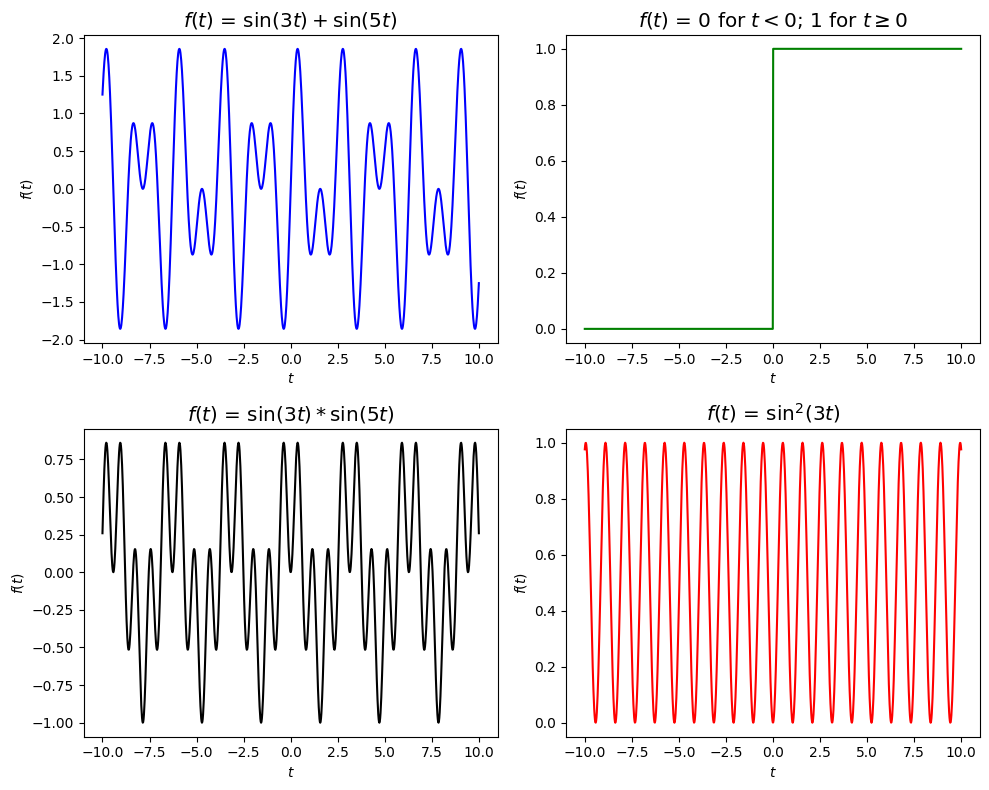

In [42]:
class Functions:
    def __init__(self, t : list):
        self.t = t
    def f_1(self):
        return np.sin(3*self.t) + np.sin(5*self.t)
    def f_2(self):
        return np.sin(3*self.t) * np.sin(5*self.t)
    def f_3(self):
        list = []
        for i in range(len(self.t)):
            if self.t[i] >= 0: list.append(1)
            elif self.t[i] < 0: list.append(0)
        return list
    def f_4(self):
        return (np.sin(3*t))**2

t = np.linspace(-10, 10, 1000)

ft = Functions(t)

fig, axs = plt.subplots(2,2,figsize = (10, 8))
plt.style.use('ggplot')
axs[0, 0].plot(t, ft.f_1(), 'b')
axs[0, 0].set_title(r"$f(t)$ = $\sin(3t)+\sin(5t)$")
axs[1, 0].plot(t, ft.f_2(), 'k')
axs[1, 0].set_title(r"$f(t)$ = $\sin(3t)*\sin(5t)$")
axs[0, 1].plot(t, ft.f_3(), 'g')
axs[0, 1].set_title("$f(t)$ = 0 for $t<0$; 1 for $t\geq0$")
axs[1, 1].plot(t, ft.f_4(), 'r')
axs[1, 1].set_title("$f(t)$ = $\sin^{2}(3t)$")

for ax in axs.flat:
    ax.set(xlabel=r'$t$', ylabel=r'$f(t)$')

fig.tight_layout()

## Part 3: Applications

### Reducing ball velocity every time it hits a wall
*https://www.glowscript.org/#/user/eriickeduardo97/folder/MyPrograms/program/Bouncingball*

### Reading csv and plotting time series

In [43]:
url = 'https://raw.githubusercontent.com/AdrianGuel/UASLP_curso/main/python/noisysignalfile.csv'

In [44]:
# Reading CSV file with Pandas
df = pd.read_csv(url)

In [45]:
# Reading CSV file with CSV library
r = requests.get(url)
buff = io.StringIO(r.text)
dr = csv.DictReader(buff)
dict_list = []
for row in dr:
    dict_list.append(row)
df_csv = pd.DataFrame.from_dict(dict_list)
df_csv

,0
0,0.086636
1,-0.086536
2,0.0001
3,0.086736
4,-0.086436
...,...
299995,-0.63051
299996,-0.54394
299997,-0.45736
299998,-0.6306


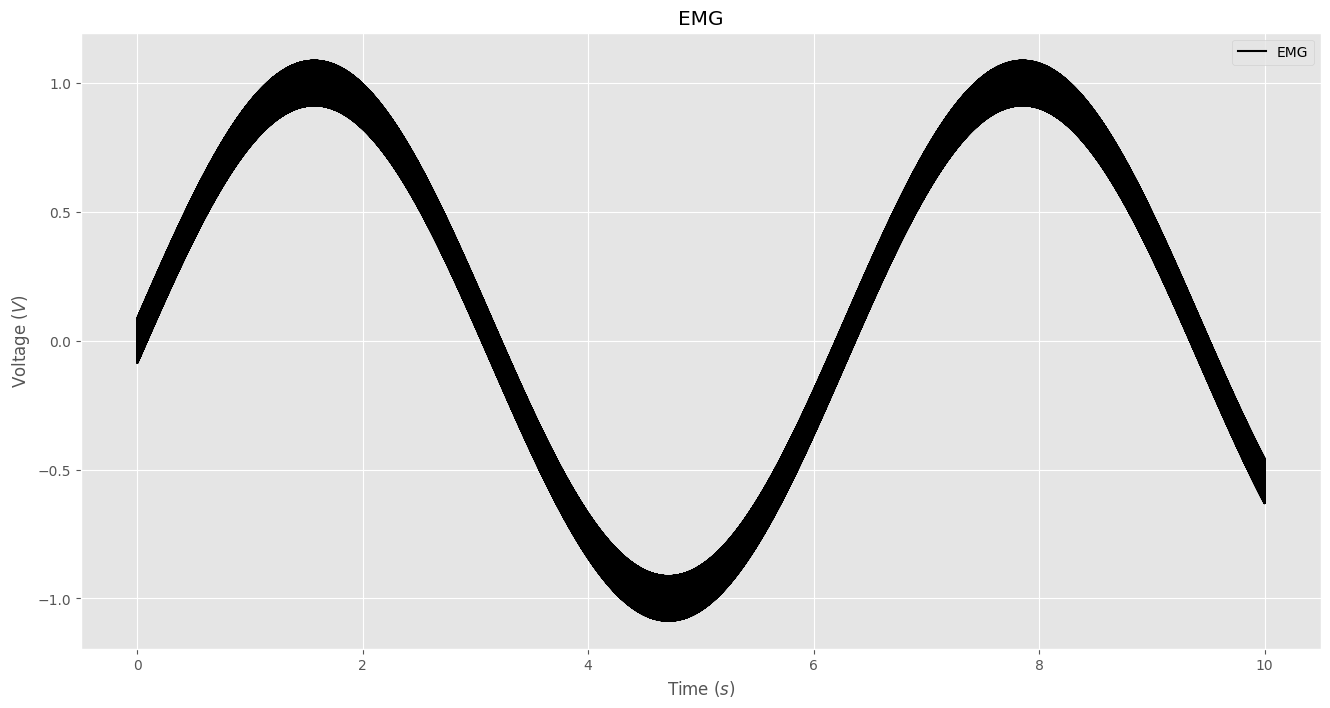

In [46]:
plt.style.use('ggplot')
plt.figure(figsize = (16, 8))
plt.plot(df["0"], df["0.1"], 'k', label=r'EMG')
plt.title('EMG')
plt.ylabel(r'Voltage $(V)$')
plt.xlabel(r'Time $(s)$')
plt.legend()
plt.show()

### Musicbox

In [47]:
from __future__ import division
try:
    from itertools import izip
except ImportError: # Python 3
    izip = zip
    xrange = range

def sine_tone(frequency, duration, volume=1, sample_rate=22050):
    n_samples = int(sample_rate * duration)
    restframes = n_samples % sample_rate

    p = PyAudio()
    stream = p.open(format=p.get_format_from_width(1),
                    channels=1,
                    rate=sample_rate,
                    output=True)
    s = lambda t: volume * math.sin(2 * math.pi * frequency * t / sample_rate)
    samples = (int(s(t) * 0x7f + 0x80) for t in range(n_samples))
    stream.write(bytes(bytearray(samples)))

    # fill remainder of frameset with silence
    stream.write(b'\x80' * restframes)

    stream.stop_stream()
    stream.close()
    p.terminate()


def A(argument):
    sine_tone(
        frequency=440.00,  
        duration=.1,  
        volume=1,  
        sample_rate=22050
    )
    return selection(argument)

def B(argument):
    sine_tone(
        frequency=493.88,  
        duration=.1,  
        volume=1,  
        sample_rate=22050
    )
    return selection(argument)

def C(argument):
    sine_tone(
        frequency=261.63,  
        duration=.1,  
        volume=1,  
        sample_rate=22050
    )
    return selection(argument)

def D(argument):
    sine_tone(
        frequency=293.66,  
        duration=.1,  
        volume=1,  
        sample_rate=22050
    )
    return selection(argument)

def E(argument):
    sine_tone(
        frequency=329.63,  
        duration=.1,  
        volume=1,  
        sample_rate=22050
    )
    return selection(argument)

def F(argument):
    sine_tone(
        frequency=349.23,  
        duration=.1,  
        volume=1,  
        sample_rate=22050
    )
    return selection(argument)

def G(argument):
    sine_tone(
        frequency=392,  
        duration=.1,  
        volume=1,  
        sample_rate=22050
    )
    return selection(argument)
  
def S(argument):
    sine_tone(
        frequency=0,  
        duration=.2,  
        volume=0,  
        sample_rate=22050
    )
    return selection(argument)

def selection(argument):
    if argument=='A':
        q=1
    elif argument=='B':
        q=2
    elif argument=='C':
        q=3
    elif argument=='D':
        q=4
    elif argument=='E':
        q=5
    elif argument=='F':
        q=6
    elif argument=='G':
        q=7
    else:
        q=8
    return q;

def actions(q,argument):
    switch ={
        1: A,
        2: B,
        3: C,
        4: D,
        5: E,
        6: F,
        7: G,
        8: S,
    }
    func=switch.get(q,lambda:"invalid state")
    return func(argument)

nota=['F', 'A', 'D', 'S', 'F', 'A', 'D', 'C' ,'F', 'A', 'D', 'F', 'A', 'D', 'S', 'S', 'F', 'A', 'D', 'F', 'A']

for x in nota:
    q=actions(q,x)

## Part 4: Classes

### Getting Graph Vertexes and Edges

Creating Graph Class

In [72]:
class Graph:

   def __init__(self,gdict=None):
      if gdict is None:
         gdict = []
      self.gdict = gdict

   def getVertices(self):
      return list(self.gdict.keys())

   def edges(self):
      return self.findedges()

   def findedges(self):
      edgename = []
      for vrtx in self.gdict:
         for nxtvrtx in self.gdict[vrtx]:
            if {nxtvrtx, vrtx} not in edgename:
               edgename.append({vrtx, nxtvrtx})
      return edgename
      
   def addVertex(self, vrtx):
      if vrtx not in self.gdict:
         self.gdict[vrtx] = []
   
   def AddEdge(self, edge):
      edge = set(edge)
      (vrtx1, vrtx2) = tuple(edge)
      if vrtx1 in self.gdict:
         self.gdict[vrtx1].append(vrtx2)
      else:
         self.gdict[vrtx1] = [vrtx2]

In [73]:
graph_elements = { 
   "a" : ["b","c"],
   "b" : ["a", "c", "d"],
   "c" : ["a", "b", "d"],
   "d" : ["b", "c"]
}
g = Graph(graph_elements)

Graph Vertex

In [74]:
print(g.getVertices())

['a', 'b', 'c', 'd']


Graph Edges

In [76]:
print(g.edges())

[{'a', 'b'}, {'a', 'c'}, {'c', 'b'}, {'b', 'd'}, {'c', 'd'}]


### Addition of vertexes and edges

Adding a Vertex

In [77]:
g.addVertex("f")
print(g.getVertices())

['a', 'b', 'c', 'd', 'f']


Adding an Edge

In [79]:
g.AddEdge({'a','f'})
g.AddEdge({'b','f'})
print(g.edges())

[{'a', 'b'}, {'a', 'c'}, {'a', 'f'}, {'c', 'b'}, {'b', 'd'}, {'c', 'd'}, {'f', 'b'}]
